In [1]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 331.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 370.9 kB/s eta 0:00:001m428.1 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import os
from glob import glob

/tmp/ipykernel_63492/378459767.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Augmentation

In [2]:
import nltk
nltk.download('punkt', 
              download_dir='/media/souravsaini/Data/POP_OS/internship/env/model_weigths')
nltk.download('averaged_perceptron_tagger', 
              download_dir='/media/souravsaini/Data/POP_OS/internship/env/model_weigths')
nltk.download('wordnet', 
              download_dir='/media/souravsaini/Data/POP_OS/internship/env/model_weigths')
nltk.download('omw-1.4', 
              download_dir='/media/souravsaini/Data/POP_OS/internship/env/model_weigths')

[nltk_data] Downloading package punkt to /media/souravsaini/Data/POP_O
[nltk_data]     S/internship/env/model_weigths...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to /media/s
[nltk_data]     ouravsaini/Data/POP_OS/internship/env/model_weigths...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /media/souravsaini/Data/POP
[nltk_data]     _OS/internship/env/model_weigths...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /media/souravsaini/Data/POP
[nltk_data]     _OS/internship/env/model_weigths...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import nltk
nltk.data.path.append('/media/souravsaini/Data/POP_OS/internship/env/model_weigths')

In [6]:
df = pd.read_csv("/media/souravsaini/Data/POP_OS/internship/eRisk/dataset/train_data.csv")
df.head()

,Unnamed: 0,subject_ID,text,Anorexia
0,0,1074,[pc] [h] 4 keys maybe 5? [w] endo so why d...,0
1,1,1101,Because he saw a movie once? It's Cana...,0
2,2,1120,What book should I read next that will scare ...,0
3,3,1137,''I only drink soda at parties'' Are y...,0
4,4,1143,"Once I named myself 'pros solo', the numbe...",0


-------------
-------------
-------------

In [4]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import random

def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    # if treebank_tag.startswith('J'):
    #     return wordnet.ADJ
    if treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    # elif treebank_tag.startswith('R'):
    #     return wordnet.ADV
    else:
        return None

def get_synonyms(word, pos=None):
    """Fetches synonyms for a word based on its part of speech."""
    synonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ')
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def augment_sentence(sentence, num_augmentations=1):
    """Augments a sentence by replacing words with their synonyms."""
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    
    augmented_sentences = [sentence]
    for _ in range(num_augmentations):
        new_sentence = words.copy()
        for i, (word, tag) in enumerate(pos_tags):
            wn_tag = get_wordnet_pos(tag)
            if wn_tag:
                synonyms = get_synonyms(word, pos=wn_tag)
                if synonyms:
                    synonym = random.choice(synonyms)
                    new_sentence[i] = synonym
        augmented_sentences.append(' '.join(new_sentence))
    
    return augmented_sentences

### Data Pre-processing

In [5]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(R"https?://\S+|www\.\S+", "", text)
    # Remove brackets (both round and square brackets)
    text = re.sub(r"[\(\)\[\]\{\}]", "", text)
    # Remove punctuation marks and non-word characters
    text = re.sub(r"[^\w\s]", "", text)
    return text

def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def extract_lemmas(text):
    keep_terms = ["why", "what", "how", "where", "when", "which"]
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    
    lemmas = []
    for word, tag in tagged_tokens:
        if word.lower() in keep_terms:  # Directly add specific terms to the output
            lemmas.append(word.lower())
            continue
        wn_tag = get_wordnet_pos(tag)
        if wn_tag in (wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV):  # Only proceed if noun or verb
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            lemmas.append(lemma)
        elif wn_tag is None and tag.startswith('NN'):  # Fallback for nouns without a clear WN tag
            lemma = lemmatizer.lemmatize(word, pos=wordnet.NOUN)
            lemmas.append(lemma)
    
    return lemmas

In [44]:
def augment_dataframe(df, num_augmentations=1):
    augmented_data = []
    for index, row in df.iterrows():
        if row['Anorexia'] == 1:
            augmented_texts = augment_sentence(clean_text((row['text']).lower()), num_augmentations)
            for text in augmented_texts:
                augmented_data.append({'subject_ID': row['subject_ID'], 
                                       'text': text, 
                                       'Anorexia': row['Anorexia']})
    
    # Convert augmented data to DataFrame
    augmented_df = pd.DataFrame(augmented_data)
    
    # Append augmented data to the original DataFrame
    new_df = pd.concat([df, augmented_df], ignore_index=True)
    
    return new_df

In [45]:
dataset = augment_dataframe(df, 4)

In [47]:
dataset.to_csv("/media/souravsaini/Data/POP_OS/internship/eRisk/dataset/aug_data.csv")

In [49]:
df['text'][2]

" What book should I read next that will scare me?       Perfect place for a vampire to take a stroll at night.  Does anyone know how Eazy E got AIDS? Are there any theories?       He's pretty involved with the website, he practically stalks people (some literally), lots of different things...\n\nMainly, it's a joke. I hope so, anyway.     Oh sorry I thought you wanted suggestions for mystery books.     Pardon, Mi'peguiin.      I have a pet one, one I heard about on here actually.  Well, two:\n\n* There was no Zodiac killer\n* James Renner is responsible for whatever happened to Muara Murray.\n\nI don't know if they are true but they are fun to think about.\n\nffffffgggdfffffffffffffffffffffffffffffffffffffffffffffgggggggggggggggggggg\n\n      **The Stand** by Stephen King     **The Couple Next Door** it's a quick read. I'm about 60% done with it and I just started it last night. Definately a page turner. So far anyway.     You already have it. The first time I read it, it's brutality-

In [51]:
extract_lemmas(clean_text((df['text'][2]).lower()))

['book',
 'i',
 'read',
 'next',
 'scare',
 'perfect',
 'place',
 'vampire',
 'take',
 'stroll',
 'night',
 'do',
 'anyone',
 'know',
 'eazy',
 'e',
 'get',
 'aid',
 'be',
 'there',
 'theory',
 's',
 'pretty',
 'involve',
 'website',
 'practically',
 'stalk',
 'people',
 'literally',
 'lot',
 'different',
 'thing',
 'mainly',
 's',
 'joke',
 'i',
 'hope',
 'so',
 'anyway',
 'oh',
 'sorry',
 'i',
 'think',
 'want',
 'suggestion',
 'mystery',
 'book',
 'pardon',
 'mi',
 'peguiin',
 'i',
 'have',
 'pet',
 'i',
 'hear',
 'here',
 'actually',
 'well',
 'be',
 'zodiac',
 'killer',
 'james',
 'renner',
 'be',
 'responsible',
 'happen',
 'muara',
 'murray',
 'i',
 'don',
 't',
 'know',
 'be',
 'true',
 'be',
 'fun',
 'think',
 'stand',
 'stephen',
 'king',
 'couple',
 'next',
 'door',
 's',
 'quick',
 'read',
 'i',
 'm',
 'do',
 'i',
 'just',
 'start',
 'last',
 'night',
 'definately',
 'page',
 'turner',
 'so',
 'far',
 'anyway',
 'already',
 'have',
 'first',
 'time',
 'i',
 'read',
 's',
 '

# Training using LLM's last hidden layer and NN

### Using Extract Lemmas function to shorten the text

In [11]:
def split_text_into_subtexts(text, max_length):
    subtexts = []
    words = text.split()
    current_subtext = ''
    for word in words:
        if len(current_subtext) + len(word) < max_length:
            current_subtext += ' ' + word
        else:
            subtexts.append(current_subtext.strip())
            current_subtext = word
    if current_subtext:
        subtexts.append(current_subtext.strip())
    return subtexts

In [12]:
import torch
Device = "cuda" if torch.cuda.is_available() else "cpu"

In [75]:
import os
import pandas as pd
import torch
import numpy as np
from transformers import LongformerTokenizer, LongformerModel
from tqdm import tqdm

tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096", 
                                                cache_dir="/media/souravsaini/Data/POP_OS/internship/env/model_weigths")
model = LongformerModel.from_pretrained("allenai/longformer-base-4096",
                                        cache_dir="/media/souravsaini/Data/POP_OS/internship/env/model_weigths")

model.to(Device)

dataset['text'] = dataset['text'].astype(str)

for index, row in tqdm(dataset.iterrows()):
    text_list = extract_lemmas(clean_text(row['text'].lower()))
    text = ""
    for i in text_list: text = text + i + " "
    target = row['Anorexia']

    subtexts = split_text_into_subtexts(text, 4000)

    temp = []
    model.eval()
    for sub in subtexts:
        inputs = tokenizer(sub, return_tensors="pt", truncation=True, padding=True)
        inputs = {key: value.to(Device) for key, value in inputs.items()}
        with torch.no_grad():
            output = model(**inputs)
        temp.append(output.last_hidden_state.squeeze().cpu())
    final_logits = torch.cat(temp, dim=0)
    if target==0:
        np.save(f"/media/souravsaini/Data/POP_OS/internship/eRisk/dataset/Aug_dataset/negative/{index}.npy",
                final_logits.cpu().numpy())
    else:
        np.save(f"/media/souravsaini/Data/POP_OS/internship/eRisk/dataset/Aug_dataset/positive/{index}.npy",
                final_logits.cpu().numpy())

173it [01:27,  1.31it/s]Input ids are automatically padded from 3 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 815 to 1024 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 355 to 512 to be a multiple of `config.attention_window`: 512
175it [01:27,  1.84it/s]Input ids are automatically padded from 130 to 512 to be a multiple of `config.attention_window`: 512
176it [01:28,  1.79it/s]Input ids are automatically padded from 180 to 512 to be a multiple of `config.attention_window`: 512
178it [01:28,  2.78it/s]Input ids are automatically padded from 146 to 512 to be a multiple of `config.attention_window`: 512
179it [01:28,  3.43it/s]Input ids are automatically padded from 62 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 276 to 512 to be a multiple of `config.attention_window`: 512
181it [01:29,  3.11it/s]Input ids are automatically padded from 33

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

Device = "cuda" if torch.cuda.is_available() else "cpu"
# Device = "cpu"

class CustomDataset(Dataset):
    def __init__(self, data_folder, is_positive):
        self.data_folder = data_folder
        self.label = 1 if is_positive else 0
        self.data = []

        # Load data from numpy files
        for file_name in os.listdir(data_folder):
            if file_name.endswith('.npy'):
                file_path = os.path.join(data_folder, file_name)
                self.data.append(file_path)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # return torch.from_numpy(np.load(self.data[idx])), torch.ones(1,1) * self.label
        return self.data[idx], self.label

# Paths to the folders containing numpy arrays
positive_folder = "/media/souravsaini/Data/POP_OS/internship/eRisk/dataset/Aug_dataset/positive"
negative_folder = "/media/souravsaini/Data/POP_OS/internship/eRisk/dataset/Aug_dataset/negative"

# Create datasets for positive and negative classes
positive_dataset = CustomDataset(positive_folder, is_positive=True)
negative_dataset = CustomDataset(negative_folder, is_positive=False)

# Split datasets into training and validation sets
train_positive, val_positive = torch.utils.data.random_split(positive_dataset, [0.8, 0.2])

train_negative, val_negative = torch.utils.data.random_split(negative_dataset, [0.8, 0.2])

# Concatenate positive and negative training datasets
train_dataset = torch.utils.data.ConcatDataset([train_positive, train_negative])
indices = torch.randperm(len(train_dataset))
train_dataset = torch.utils.data.Subset(train_dataset, indices)

# Concatenate positive and negative validation datasets
val_dataset = torch.utils.data.ConcatDataset([val_positive, val_negative])
indices = torch.randperm(len(val_dataset))
val_dataset = torch.utils.data.Subset(val_dataset, indices)

/media/souravsaini/Data/POP_OS/internship/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        # self.attention = nn.MultiheadAttention(768, 8)
        self.fc1 = nn.Linear(in_features=768, out_features=384)
        self.fc2 = nn.Linear(in_features=384, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc2(torch.relu(self.fc1(x))))
        # Perform global pooling over the batch dimension
        x = torch.mean(x, dim=0, keepdim=True)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.attention = nn.MultiheadAttention(768, 8)
        self.fc1 = nn.Linear(in_features=768, out_features=384)
        self.fc2 = nn.Linear(in_features=384, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(0)
        x, _ = self.attention(x, x, x)
        x = x.squeeze(0)
        x = torch.relu(self.fc2(torch.relu(self.fc1(x))))
        # Perform global pooling over the batch dimension
        x = torch.mean(x, dim=0, keepdim=True)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [4]:
num_labels = 1
model = BinaryClassifier()
model.to(Device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
lambda1 = lambda epoch: 0.96 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
criterion = torch.nn.BCELoss()
num_epochs = 50

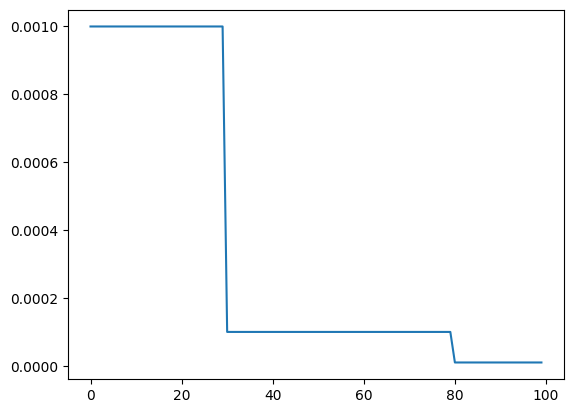

In [11]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

model1 = torch.nn.Linear(2, 1)
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3)
lambda1 = lambda epoch: 0.99 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
# MultiplicativeLR
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30,80], gamma=0.1)



lrs = []

for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(100),lrs)

In [6]:
from tqdm import tqdm

best_val_loss = 1e+6

for epoch in range(num_epochs):
    model.train()
    loss_train = 0
    for feature, labels in tqdm(train_dataset, desc=f"training epoch = {epoch}"): 
        optimizer.zero_grad()
        feature = torch.from_numpy(np.load(feature))
        labels = torch.ones(1,1).to(Device) * labels         
        feature = feature.to(Device)
        logits = model(feature)
        loss = criterion(logits, labels.float())
        loss_train += loss.item()
        loss.backward()
        optimizer.step()
    scheduler.step()

    print(f"training_loss = {loss_train/len(train_dataset)}")

    # Validation loop
    model.eval()
    val_loss = 0
    num_val_steps =  0
    with torch.no_grad():
        for feature, labels in tqdm(val_dataset, desc=f"validation epoch = {epoch}"):
            labels = torch.ones(1,1).to(Device) * labels
            feature = torch.from_numpy(np.load(feature))          
            feature = feature.to(Device)
            logits = model(feature)
            loss = criterion(logits, labels.float())
            val_loss += loss.item()

            num_val_steps += 1

    val_loss /= num_val_steps

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(),
               os.path.join("/media/souravsaini/Data/POP_OS/internship/models_wts/longformer/Aug_dataset/with_MHA",
                            f"model_best.pt"))

    if epoch%5 == 0:
        torch.save(model.state_dict(),
               os.path.join("/media/souravsaini/Data/POP_OS/internship/models_wts/longformer/Aug_dataset/with_MHA",
                            f"epoch_{epoch}_val_loss_{val_loss}.pt"))

    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'Val loss: {val_loss:.4f}')

training epoch = 0:   0%|          | 11/2959 [00:12<54:08,  1.10s/it]


OutOfMemoryError: CUDA out of memory. Tried to allocate 696.00 MiB (GPU 0; 3.82 GiB total capacity; 2.74 GiB already allocated; 335.88 MiB free; 2.77 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [91]:
torch.save(model.state_dict(),
               os.path.join("/media/souravsaini/Data/POP_OS/internship/models_wts/longformer/Aug_dataset",
                            f"epoch_{epoch}_val_loss_{val_loss}.pt"))

# Validation

In [43]:
def get_metrics(y_pred, y_true, loss=float('nan')):
    true_positives = np.sum(np.logical_and(y_pred == 1, y_true == 1))
    true_negatives = np.sum(np.logical_and(y_pred == 0, y_true == 0))
    false_positives = np.sum(np.logical_and(y_pred == 1, y_true == 0))
    false_negatives = np.sum(np.logical_and(y_pred == 0, y_true == 1))
    accuracy = (true_positives + true_negatives) / len(y_true)
    assert not np.isnan(true_negatives)
    assert not np.isnan(false_positives)
    assert not np.isnan(false_negatives)
    assert not np.isnan(true_positives)

    if true_positives > 0:
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1_score = 2 * ((precision * recall) / (precision + recall))
        iou = true_positives / (true_positives + false_positives + false_negatives)
    else:
        precision = recall = f1_score = iou = float('NaN')
    return {
        "accuracy": accuracy,
        "TN": true_negatives,
        "FP": false_positives,
        "FN": false_negatives,
        "TP": true_positives,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "iou": iou,
        "true_mean": np.mean(y_true),
        "pred_mean": np.mean(y_pred),
        "loss": loss
    }

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def threshold_prediction(probabilities, threshold):
    predictions = []
    for prob in probabilities:
        if prob > threshold: predictions.append(1)
        else: predictions.append(0)
    return np.array(predictions)

def calculate_precision_recall(probabilities, labels, thresholds):
    results = []
    for threshold in thresholds:
        predictions = threshold_prediction(probabilities, threshold)
        metrics = get_metrics(predictions, labels)
        results.append({'Threshold': threshold, 'Precision': metrics['precision'], 'Recall': metrics['recall']})
    return pd.DataFrame(results)

SyntaxError: ':' expected after dictionary key (1858301148.py, line 17)

#### Results of last saved model

In [11]:
from tqdm import tqdm
probs, target = [], []
model.load_state_dict(torch.load("/media/souravsaini/Data/POP_OS/internship/models_wts/longformer/Aug_dataset/epoch_49_val_loss_0.1539282605572142.pt"))
model.eval()
with torch.no_grad():
    for feature, labels in tqdm(val_dataset):
        feature = torch.from_numpy(np.load(feature))         
        feature = feature.to(Device)
        logits = model(feature)

        probs.append(logits[0][0].cpu().numpy())
        target.append(labels)

probs = np.array(probs)
target = np.array(target)

100%|██████████| 738/738 [02:27<00:00,  4.99it/s]


In [17]:
probs<0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

def threshold_prediction(probabilities, threshold):
    predictions = []
    for prob in probabilities:
        if prob > threshold: predictions.append(1)
        else: predictions.append(0)
    return predictions

def calculate_precision_recall(probabilities, labels, thresholds):
    results = []
    for threshold in thresholds:
        predictions = threshold_prediction(probabilities, threshold)
        precision = precision_score(labels, predictions)
        recall = recall_score(labels, predictions)
        results.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall})
    return pd.DataFrame(results)

/tmp/ipykernel_12235/5445537.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


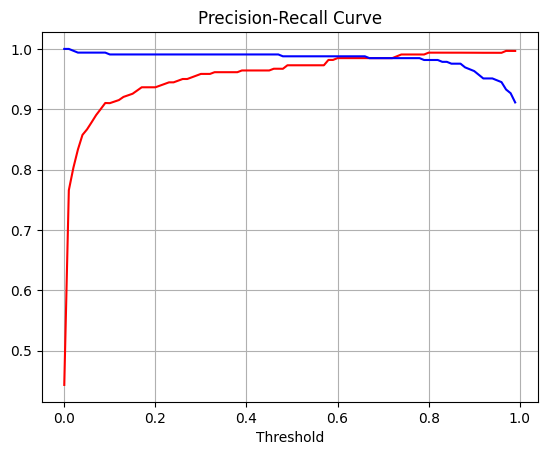

    Threshold  Precision    Recall
0        0.00   0.443089  1.000000
1        0.01   0.765808  1.000000
2        0.02   0.802956  0.996942
3        0.03   0.833333  0.993884
4        0.04   0.857520  0.993884
..        ...        ...       ...
95       0.95   0.993590  0.948012
96       0.96   0.993569  0.944954
97       0.97   0.996732  0.932722
98       0.98   0.996711  0.926606
99       0.99   0.996656  0.911315

[100 rows x 3 columns]


In [22]:
thresholds = np.arange(0.0, 1, 0.01)
results_df = calculate_precision_recall(probs, target, thresholds)

plt.plot(thresholds, results_df['Precision'], color="red")
plt.plot(thresholds, results_df['Recall'], color="blue")
plt.xlabel('Threshold')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(results_df)

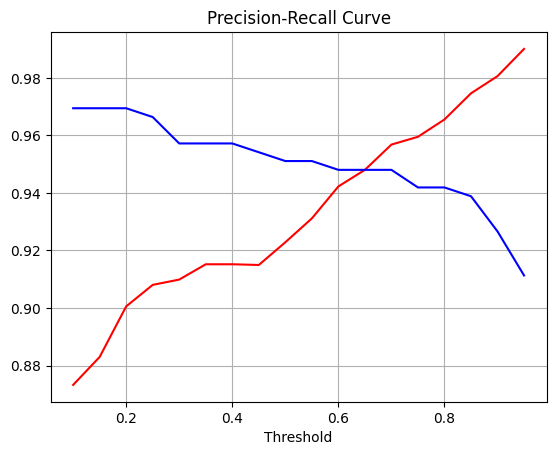

    Threshold  Precision    Recall
0        0.10   0.873278  0.969419
1        0.15   0.883008  0.969419
2        0.20   0.900568  0.969419
3        0.25   0.908046  0.966361
4        0.30   0.909884  0.957187
5        0.35   0.915205  0.957187
6        0.40   0.915205  0.957187
7        0.45   0.914956  0.954128
8        0.50   0.922849  0.951070
9        0.55   0.931138  0.951070
10       0.60   0.942249  0.948012
11       0.65   0.948012  0.948012
12       0.70   0.956790  0.948012
13       0.75   0.959502  0.941896
14       0.80   0.965517  0.941896
15       0.85   0.974603  0.938838
16       0.90   0.980583  0.926606
17       0.95   0.990033  0.911315


In [102]:
thresholds = np.arange(0.1, 1.0, 0.05)
results_df = calculate_precision_recall(probs, target, thresholds)

plt.plot(thresholds, results_df['Precision'], color="red")
plt.plot(thresholds, results_df['Recall'], color="blue")
plt.plot(thresholds, results_df[''])
plt.xlabel('Threshold')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(results_df)

#### Results of the best saved model

In [103]:
probs, target = [], []
model.load_state_dict(torch.load("/media/souravsaini/Data/POP_OS/internship/models_wts/longformer/Aug_dataset/model_best.pt"))
model.eval()
with torch.no_grad():
    for feature, labels in tqdm(val_dataset):
        feature = torch.from_numpy(np.load(feature))         
        feature = feature.to(Device)
        logits = model(feature)

        probs.append(logits[0][0].cpu().numpy())
        target.append(labels)

probs = np.array(probs)
target = np.array(target)

100%|██████████| 738/738 [03:15<00:00,  3.78it/s]


In [105]:
probs>0.5

array([False,  True,  True, False,  True,  True,  True, False,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,

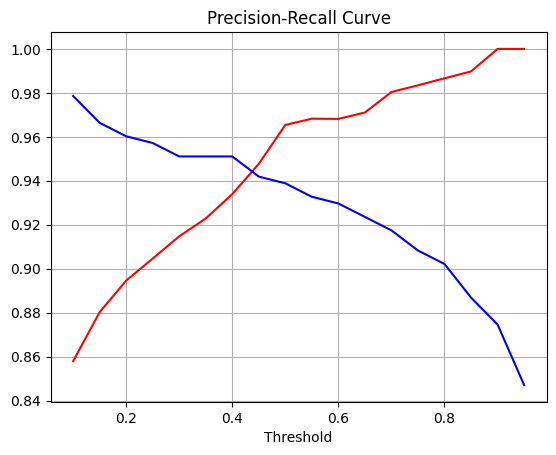

    Threshold  Precision    Recall
0        0.10   0.857909  0.978593
1        0.15   0.880223  0.966361
2        0.20   0.894587  0.960245
3        0.25   0.904624  0.957187
4        0.30   0.914706  0.951070
5        0.35   0.922849  0.951070
6        0.40   0.933934  0.951070
7        0.45   0.947692  0.941896
8        0.50   0.965409  0.938838
9        0.55   0.968254  0.932722
10       0.60   0.968153  0.929664
11       0.65   0.971061  0.923547
12       0.70   0.980392  0.917431
13       0.75   0.983444  0.908257
14       0.80   0.986622  0.902141
15       0.85   0.989761  0.886850
16       0.90   1.000000  0.874618
17       0.95   1.000000  0.847095


In [106]:
thresholds = np.arange(0.1, 1.0, 0.05)
results_df = calculate_precision_recall(probs, target, thresholds)

plt.plot(thresholds, results_df['Precision'], color="red")
plt.plot(thresholds, results_df['Recall'], color="blue")
plt.xlabel('Threshold')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(results_df)

# Evaluation Metrics

In [12]:
import math

def get_delays(preds, delays_all):
    delays = []
    for i in range(0, len(preds)):
        delay = 0
        for j in range(0, len(preds[i])):
            if preds[i][j] == 1:
                # delay += delays_all[i][j]
                break
            delay += delays_all[i][j]
        delays.append(delay)
    return delays

import numpy as np

def lco(k, o):
    if k - o > 700:
        return 1.0
    elif k - o < -700:
        return 0.0
    else:
        return 1 - (1 / (1 + np.exp(k - o)))


def calculate_ERDE(preds, delays, ground_truth, cfn, ctp, o):
    cfp = np.sum(ground_truth)/len(ground_truth)
    erde_values = []
    for pred, gt, delay in zip(preds, ground_truth, delays):
        if pred == 1 and gt == 1:
            erde = lco(delay, o) * ctp 
        elif pred == 0 and gt == 1:
            erde = cfn
        elif pred == 1 and gt == 0:
            erde = cfp
        else:
            erde = 0
        erde_values.append(erde)
    return sum(erde_values) / len(erde_values)

# Testing

In [15]:
import pandas as pd
testing_dataset = pd.read_csv("/home/ajeet/Sourav/test_data.csv")

In [16]:
testing_dataset.head()

,Unnamed: 0,subject_ID,num_writings,text,Anorexia
0,0,1152_1,4,Student at uw. Need a few hours away from cam...,1
1,1,1169_1,14,"Haha, nailed it dude.\n Rings are defi...",1
2,2,1441_1,55,"Right, which is why I said those people wo...",1
3,3,1518_1,31,I just have a lot of self hatred and depri...,1
4,4,1773_1,1,Thank you for your long reply! I have been...,1


In [18]:
import os
import pandas as pd
import torch
import numpy as np
from transformers import LongformerTokenizer, LongformerModel
from tqdm import tqdm

tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096", 
                                                cache_dir="/media/souravsaini/Data/POP_OS/internship/env/model_weigths")
model = LongformerModel.from_pretrained("allenai/longformer-base-4096",
                                        cache_dir="/media/souravsaini/Data/POP_OS/internship/env/model_weigths")

model.to(Device)

testing_dataset['text'] = testing_dataset['text'].astype(str)

for index, row in tqdm(testing_dataset.iterrows()):
    if index<1132: continue
    text_list = extract_lemmas(clean_text(row['text'].lower()))
    text = ""
    for i in text_list: text = text + i + " "
    target = row['Anorexia']

    subtexts = split_text_into_subtexts(text, 4000)

    try:
        temp = []
        model.eval()
        for sub in subtexts:
            inputs = tokenizer(sub, return_tensors="pt", truncation=True, padding=True)
            inputs = {key: value.to(Device) for key, value in inputs.items()}
            with torch.no_grad():
                output = model(**inputs)
            temp.append(output.last_hidden_state.squeeze().cpu())
        final_logits = torch.cat(temp, dim=0)
        chunk = int(row["subject_ID"].split("_")[-1])
        subject_id = int(row["subject_ID"].split("_")[0])
        np.save(f"/media/souravsaini/Data/POP_OS/internship/eRisk/dataset/test_dataset/{chunk}/{subject_id}.npy",
                    final_logits.cpu().numpy())
    except:
        pass

1133it [00:01, 578.52it/s]Input ids are automatically padded from 20 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 440 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 593 to 1024 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 576 to 1024 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 193 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 248 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 73 to 512 to be a multiple of `config.attention_window`: 512
Input ids are automatically padded from 585 to 1024 to be a multiple of `config.attention_window`: 512
1177it [00:19, 44.12it/s] Input ids are automatically padded from 934 to 1024 to be a multiple of `config.attention_window`: 512
Input ids are automatically 

In [17]:
d = {}
with open("/home/ajeet/Sourav/risk-golden-truth-test.txt", 'r') as f:
    for line in f:
        subject, label = line.split()
        d[subject[7:]] = int(label)

len(d)

320

In [18]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from glob import glob
import random

class NpyDataset(Dataset):
    def __init__(self, npy_folder, labels_dict, delay_dict):
        self.npy_folder = npy_folder
        self.labels_dict = labels_dict
        self.delay_dict = delay_dict
        self.my_list = glob(os.path.join(npy_folder, "*"))
        file_names = glob(os.path.join(self.my_list[0], "*.npy"))
        self.file_names = random.sample(file_names, len(file_names))

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        file_path_list = []
        delay_list = []
        file_path = self.file_names[idx]
        file = file_path.split('/')[-1]
        for i in range(1, 11):
            file_path_list.append(os.path.join(self.npy_folder, str(i), file))
            try:
                delay = self.delay_dict[file.split('.')[0] + '_' + str(i)]
                # print(np.array(time).shape)
                delay_list.append(delay)

            except:   
                delay_list.append(0)
            
        subject = file_path.split('/')[-1].split('.')[0]
        label = self.labels_dict[subject]

        return file_path_list, delay_list, label

In [19]:
def evaluate(test_dataset, model):
    Device = 'cuda' if torch.cuda.is_available() else 'cpu'
    probs, target, delays = [], [], []
    model.to(Device)
    model.eval()
    with torch.no_grad():
        for features, delay, label in tqdm(test_dataset):
            temp = []
            for feature in features:
                try:
                    feature = torch.from_numpy(np.load(feature))         
                    feature = feature.to(Device)
                    logits = model(feature)

                    temp.append(logits[0][0].cpu().numpy())
                except:
                    temp.append(0)
            target.append(label)
            probs.append(temp)
            delays.append(delay)

    probs = np.array(probs)
    target = np.array(target)
    return probs, target, delays

In [21]:
delay_dict = dict(zip(testing_dataset['subject_ID'], testing_dataset['num_writings']))

In [25]:
test_dataset = NpyDataset("/home/ajeet/Sourav/test_dataset_longformer", d, delay_dict)
print(test_dataset[0])

(['/home/ajeet/Sourav/test_dataset_longformer/1/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/2/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/3/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/4/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/5/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/6/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/7/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/8/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/9/626.npy', '/home/ajeet/Sourav/test_dataset_longformer/10/626.npy'], [66, 66, 66, 66, 66, 66, 66, 66, 66, 65], 0)


# Without Attention

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        # self.attention = nn.MultiheadAttention(768, 8)
        self.fc1 = nn.Linear(in_features=768, out_features=384)
        self.fc2 = nn.Linear(in_features=384, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x = x.unsqueeze(0)
        # x, _ = self.attention(x, x, x)
        # x = x.squeeze(0)
        x = torch.relu(self.fc2(torch.relu(self.fc1(x))))
        # Perform global pooling over the batch dimension
        x = torch.mean(x, dim=0, keepdim=True)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [29]:
from tqdm import tqdm

model = BinaryClassifier()
model.load_state_dict(torch.load("/home/ajeet/Sourav/longformer/Aug_dataset/without_MHA/model_best.pt"))
# model.to(Device)

<All keys matched successfully>

In [30]:
probs, label, delay = evaluate(test_dataset, model)

100%|██████████| 320/320 [03:12<00:00,  1.66it/s]


      threshold  f1_score
0         0.000  0.227147
1         0.001  0.239067
2         0.002  0.253870
3         0.003  0.275168
4         0.004  0.290780
...         ...       ...
1005      1.005  0.000000
1006      1.006  0.000000
1007      1.007  0.000000
1008      1.008  0.000000
1009      1.009  0.000000

[1010 rows x 2 columns]


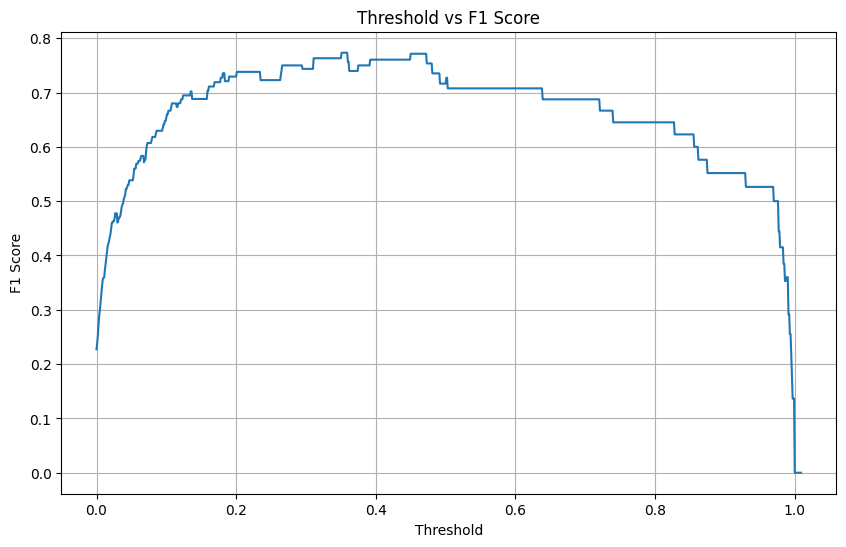

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Initialize lists to store results
thresholds = np.arange(0, 1.01, 0.001)
f1_scores = []

# Calculate F1 score for each threshold
for threshold in thresholds:
    pred_labels = []
    for i in range(len(probs)):
        temp = []
        for j in range(len(probs[i])):
            if probs[i][j] > threshold: 
                temp.append(1)
            else: 
                temp.append(0)
        pred_labels.append(temp)

    preds = []
    for i in pred_labels:
        if sum(i) > 4: 
            preds.append(1)
        else: 
            preds.append(0)
    
    f1 = f1_score(label, preds)
    f1_scores.append(f1)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'threshold': thresholds,
    'f1_score': f1_scores
})

# Print the DataFrame
print(results_df)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(results_df['threshold'], results_df['f1_score'])
plt.title('Threshold vs F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

In [32]:
results_df.to_csv("/home/ajeet/Sourav/threshold_vs_f1/longformer_aug")

In [137]:
pred_labels = []
for i in range(0,len(probs)):
    temp = []
    for j in range(0, len(probs[i])):
        if probs[i][j]>=0.5: temp.append(1)
        else: temp.append(0)
    pred_labels.append(temp)

In [138]:
pred_labels

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0,

In [139]:
delays = get_delays(pred_labels)
print(delays)

[10, 10, 10, 10, 6, 10, 10, 0, 10, 10, 10, 10, 2, 10, 0, 10, 0, 10, 10, 10, 10, 10, 8, 0, 5, 10, 4, 4, 10, 0, 1, 10, 8, 10, 8, 10, 10, 1, 10, 10, 10, 10, 3, 0, 10, 1, 6, 10, 0, 0, 0, 10, 10, 10, 10, 2, 10, 10, 0, 0, 0, 10, 10, 6, 10, 1, 2, 0, 10, 3, 10, 10, 10, 10, 0, 1, 10, 0, 2, 10, 10, 5, 10, 10, 10, 10, 10, 2, 10, 5, 8, 10, 10, 2, 4, 10, 7, 10, 10, 10, 2, 10, 10, 2, 6, 10, 10, 10, 10, 3, 10, 10, 0, 10, 0, 10, 9, 1, 2, 10, 10, 10, 10, 10, 0, 10, 10, 6, 10, 2, 10, 0, 10, 10, 10, 2, 1, 3, 3, 0, 10, 0, 10, 10, 3, 4, 6, 10, 10, 3, 0, 10, 10, 10, 10, 10, 10, 10, 5, 0, 10, 10, 10, 10, 1, 10, 7, 10, 10, 8, 10, 10, 10, 0, 10, 10, 1, 6, 7, 10, 10, 10, 2, 0, 10, 5, 0, 10, 2, 10, 0, 10, 10, 7, 10, 1, 10, 7, 10, 4, 5, 10, 5, 0, 0, 10, 10, 10, 1, 10, 10, 10, 3, 6, 10, 10, 2, 3, 10, 3, 0, 2, 10, 10, 10, 0, 0, 10, 10, 10, 1, 3, 10, 10, 10, 0, 0, 1, 0, 5, 4, 10, 0, 1, 1, 10, 4, 10, 10, 4, 3, 10, 10, 10, 10, 6, 10, 10, 5, 10, 3, 10, 10, 2, 10, 10, 1, 10, 0, 6, 10, 1, 10, 10, 4, 10, 10, 9, 10, 10, 10

In [142]:
preds = []
for i in pred_labels:
    if sum(i)>4: preds.append(1)
    else: preds.append(0)

precision = precision_score(label, preds)
recall = recall_score(label, preds)
print(f"precision = {precision}\nrecall = {recall}")

precision = 0.84375
recall = 0.6585365853658537


In [143]:
cfp = 0.01  # Cost of false positive
cfn = 1     # Cost of false negative
ctp = 1     # Cost of true positive
o = 5       # Parameter controlling the rate of increase for latency cost
ERDE5 = calculate_ERDE(preds, delays, label, cfn, ctp, o)
ERDE50 = calculate_ERDE(preds, delays, label, cfn, ctp, o*10)
print(f"ERDE5 = {ERDE5*100}%\nERDE50 = {ERDE50*100}%")

ERDE5 = 4.749664583444183%
ERDE50 = 4.5751953125%


# With Attention

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.attention = nn.MultiheadAttention(768, 12)
        self.fc1 = nn.Linear(in_features=768, out_features=384)
        self.fc2 = nn.Linear(in_features=384, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=32)
        self.fc4 = nn.Linear(in_features=32, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(0)
        x, _ = self.attention(x, x, x)
        x = x.squeeze(0)
        x = torch.relu(self.fc2(torch.relu(self.fc1(x))))
        # Perform global pooling over the batch dimension
        x = torch.relu(self.fc3(x))
        x = torch.mean(x, dim=0, keepdim=True)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [ ]:
from tqdm import tqdm

model = BinaryClassifier()
# model.load_state_dict(torch.load("/media/souravsaini/Data/POP_OS/internship/models_wts/longformer/Aug_dataset/epoch_49_val_loss_0.1539282605572142.pt"))
model.load_state_dict(torch.load("/home/ajeet/Sourav/longformer/att/ckpt/model_best.pt"))